# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [3]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [4]:
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [5]:
# Get the number of rows and columns: df.shape ---> (rows, columns) 
df.shape

(1653, 30)

In [6]:
df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [7]:
df.sort_values(by='networthusbillion', ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [8]:
# How many male billionaires are there compared to the number of female billionares?
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [9]:
# What percent is that? 
round(df.gender.value_counts()/len(df) * 100,2)

male      89.11
female    10.89
Name: gender, dtype: float64

In [10]:
# Do they have a different average wealth?¶
df.groupby('gender').networthusbillion.mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [11]:
# What is the most common source/type of wealth? ----> real estate (107)
df.sourceofwealth.value_counts()

real estate                 107
diversified                  69
retail                       63
investments                  60
pharmaceuticals              42
                           ... 
finance, diversified          1
hydraulic lift machinery      1
Starbucks                     1
plumbing fixtures             1
TV broadcasting               1
Name: sourceofwealth, Length: 615, dtype: int64

In [31]:
# Magic method 2 suggested by Rodrigo(TA)!!
df.groupby('gender').sourceofwealth.value_counts().groupby(level=0).nlargest(5)

gender  gender  sourceofwealth 
female  female  diversified          9
                real estate          7
                media                6
                construction         5
                consumer goods       5
male    male    real estate        100
                diversified         60
                retail              60
                investments         58
                pharmaceuticals     40
Name: sourceofwealth, dtype: int64

In [15]:
# females'most common source/type of wealth ---> diversified（9）
df.gender == "female"
df_female = df[df.gender == 'female']
df_female.sourceofwealth.value_counts()

diversified                 9
real estate                 7
media                       6
construction                5
hotels, investments         5
                           ..
art collection, Swatch      1
hair products               1
advertising                 1
casinos, hotels             1
inherited, Mori Building    1
Name: sourceofwealth, Length: 100, dtype: int64

In [16]:
# males'most common source/type of wealth ---> real estate (100)          
df.gender == "male"
df_male = df[df.gender == 'male']
df_male.sourceofwealth.value_counts()

real estate                     100
diversified                      60
retail                           60
investments                      58
pharmaceuticals                  40
                               ... 
gas                               1
tobacco distribution, retail      1
drilling, shipping                1
energy services                   1
TV broadcasting                   1
Name: sourceofwealth, Length: 577, dtype: int64

In [17]:
#df.groupby(by="gender").typeofwealth.value_counts() ---> type of wealth is actually another seperate column whose output might be much cleaner than source of wealth

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

In [18]:
# What companies have the most billionaires?
df.company.value_counts().head()

Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Votorantim Group        6
Name: company, dtype: int64

<AxesSubplot:>

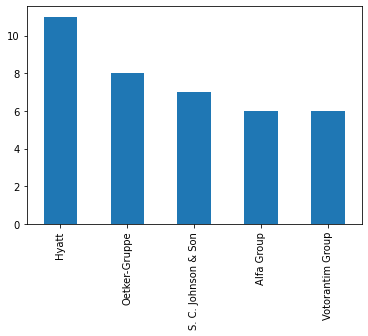

In [19]:
df.company.value_counts().head().plot(kind="bar")

## 7) How much money do these billionaires have in total?

In [20]:
round(df.networthusbillion.sum(),2) #billion in total

6454.4

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [21]:
df.groupby('countrycode').networthusbillion.sum().sort_values(ascending=False).head(10)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [22]:
# How old is an average billionaire? 
round(df.age.mean(),2)

63.34

In [23]:
# How old are self-made billionaires vs. non self-made billionaires? 

round(df.groupby(by="selfmade").age.mean(),2)

selfmade
inherited    64.96
self-made    62.63
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [24]:
df.sort_values(by="age")
# youngest: Perenna Kei

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN
127,2014,"Anton Kathrein, Jr.",1270,Germany,DEU,1.4,inherited,inherited,male,29.0,...,relation,1919.0,NaN,antennas,3rd generation,NaN,http://www.forbes.com/profile/anton-kathrein-jr/#,NaN,NaN,NaN
394,2014,Drew Houston,1372,United States,USA,1.2,self-made,founder non-finance,male,30.0,...,founder,2007.0,NaN,Dropbox,NaN,NaN,http://en.wikipedia.org/wiki/Drew_Houston,http://en.wikipedia.org/wiki/Dropbox_(service),http://www.forbes.com/profile/drew-houston/,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2014,Tsai Cheng-da,988,Taiwan,Taiwan,1.8,inherited,inherited,male,NaN,...,relation,1962.0,NaN,finance,inherited from father,NaN,http://www.forbes.com/profile/tsai-cheng-da/,https://www.cathayholdings.com/holdings/web/ab...,NaN,NaN
1512,2014,Vanich Chaiyawan,429,Thailand,THA,3.7,self-made,self-made finance,male,NaN,...,Chairman,1942.0,NaN,"insurance, beverages",NaN,NaN,http://www.thailife.com/a-thai-company-for-tha...,"Business Times (Singapore) September 16, 1993",NaN,NaN
1516,2014,Victor Civita Neto,1540,Brazil,BRA,1.1,inherited,inherited,male,NaN,...,relation,1950.0,NaN,media,3rd generation,NaN,http://www.forbes.com/profile/roberta-anamaria...,NaN,NaN,NaN
1555,2014,Wang Wei,375,China,CHN,4.0,self-made,founder non-finance,male,NaN,...,founder,1993.0,NaN,delivery service,2013 Saw investment from outside investors wit...,NaN,http://www.forbes.com/profile/wang-wei/,NaN,NaN,NaN


In [25]:
df.sort_values(by="age",ascending=False)
# oldest: David Rockefeller, Sr.

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN
588,2014,Henry Hillman,687,United States,USA,2.5,inherited,inherited,male,95.0,...,relation,1942.0,NaN,investments,inherited from father,NaN,http://www.forbes.com/profile/henry-hillman/,http://en.wikipedia.org/wiki/Calgon_Carbon,NaN,NaN
435,2014,Erika Pohl-Stroher,1154,Germany,DEU,1.5,inherited,inherited,female,95.0,...,relation,1880.0,NaN,hair products,3rd generation,23% stake in the company,http://www.forbes.com/profile/erika-pohl-stroher/,http://en.wikipedia.org/wiki/Wella,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2014,Tsai Cheng-da,988,Taiwan,Taiwan,1.8,inherited,inherited,male,NaN,...,relation,1962.0,NaN,finance,inherited from father,NaN,http://www.forbes.com/profile/tsai-cheng-da/,https://www.cathayholdings.com/holdings/web/ab...,NaN,NaN
1512,2014,Vanich Chaiyawan,429,Thailand,THA,3.7,self-made,self-made finance,male,NaN,...,Chairman,1942.0,NaN,"insurance, beverages",NaN,NaN,http://www.thailife.com/a-thai-company-for-tha...,"Business Times (Singapore) September 16, 1993",NaN,NaN
1516,2014,Victor Civita Neto,1540,Brazil,BRA,1.1,inherited,inherited,male,NaN,...,relation,1950.0,NaN,media,3rd generation,NaN,http://www.forbes.com/profile/roberta-anamaria...,NaN,NaN,NaN
1555,2014,Wang Wei,375,China,CHN,4.0,self-made,founder non-finance,male,NaN,...,founder,1993.0,NaN,delivery service,2013 Saw investment from outside investors wit...,NaN,http://www.forbes.com/profile/wang-wei/,NaN,NaN,NaN


<AxesSubplot:>

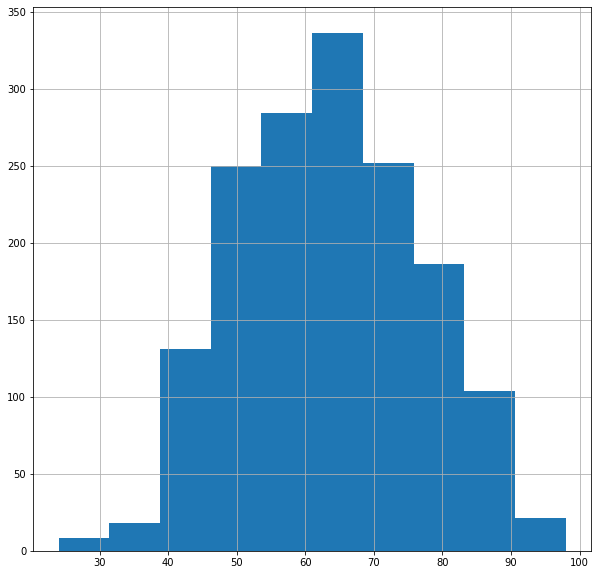

In [16]:
# .hist() will return the histogram for each numeric column in the pandas dataframe.
# custom size for each historgram by sending it something like .hist(figsize=(15,2))

df.age.hist(figsize=(10,10))

# If you don't define age here, df.hist()will out put every single column (multiple charts) ---> so do the age!
# y axis of each historgram represent --> the numbers of people within certain age range!
# and don't understand how the charts of age shows the max & age and the persons?!! ---> don't have to cuz they're three seperate anwsers

## 11) Make a scatterplot of net worth compared to age

<AxesSubplot:xlabel='age', ylabel='networthusbillion'>

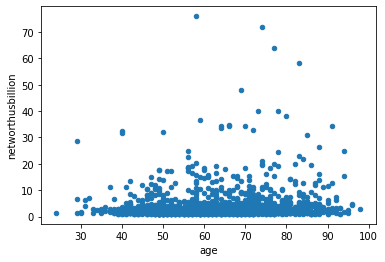

In [203]:
# df.plot.scatter(x = 'x_column_name', y = 'y_columnn_name')

df.plot.scatter(x="age", y="networthusbillion")

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<AxesSubplot:title={'center':'The wealth of Top 10 Richest Billionaires'}, xlabel='name'>

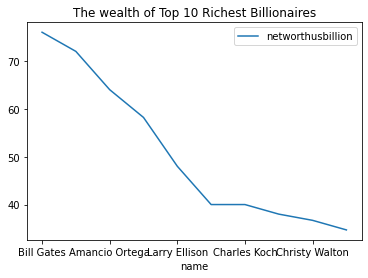

In [211]:
df.sort_values(by="networthusbillion", ascending=False).head(10).plot(x="name",y="networthusbillion", title="The wealth of Top 10 Richest Billionaires")